<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model 1</a></span></li><li><span><a href="#Testing-the-assumptions-of-linear-regression" data-toc-modified-id="Testing-the-assumptions-of-linear-regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Testing the assumptions of linear regression</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model 3</a></span></li></ul></li><li><span><a href="#Random-Forest-regressor" data-toc-modified-id="Random-Forest-regressor-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Forest regressor</a></span><ul class="toc-item"><li><span><a href="#Optimizing-random-forest" data-toc-modified-id="Optimizing-random-forest-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Optimizing random forest</a></span></li><li><span><a href="#Prediction-&amp;-Water-Demand" data-toc-modified-id="Prediction-&amp;-Water-Demand-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Prediction &amp; Water Demand</a></span></li></ul></li></ul></div>

In [391]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as stm
import math
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import numpy as np
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import jarque_bera
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
os.chdir(r'D:\DS\Machine learning\Datasets')

In [3]:
conc=pd.read_csv('concrete.csv')

In [4]:
conc.columns=['Cement','BFS','FlyAsh','Water','Admix','CA','FA','Age','CompressiveStrength']

In [5]:
conc.shape

(1030, 9)

In [6]:
conc.isna().sum()

Cement                 0
BFS                    0
FlyAsh                 0
Water                  0
Admix                  0
CA                     0
FA                     0
Age                    0
CompressiveStrength    0
dtype: int64

In [7]:
conc.head()

,Cement,BFS,FlyAsh,Water,Admix,CA,FA,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
conc.drop_duplicates(subset=['Cement','BFS','FlyAsh','Water','Admix','CA','FA','Age'],inplace=True)

In [9]:
conc.shape

(992, 9)

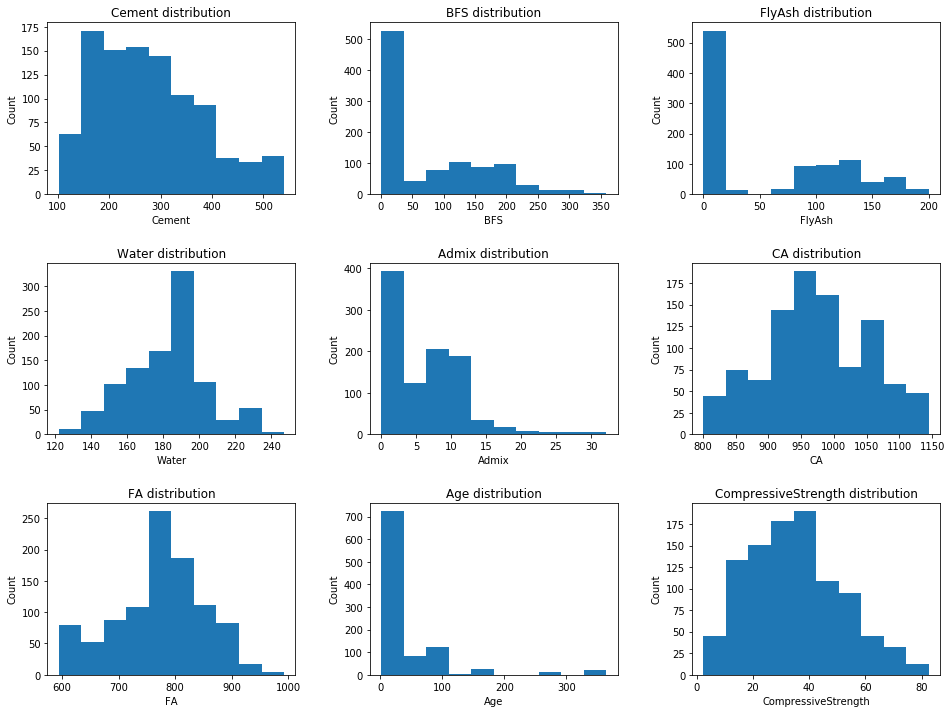

In [10]:
cols=conc.columns
j=1
plt.figure(figsize=(16,12))
for i in cols:
    plt.subplot(3,3,j)
    j+=1
    plt.hist(i,data=conc)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('%s distribution'%i)
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

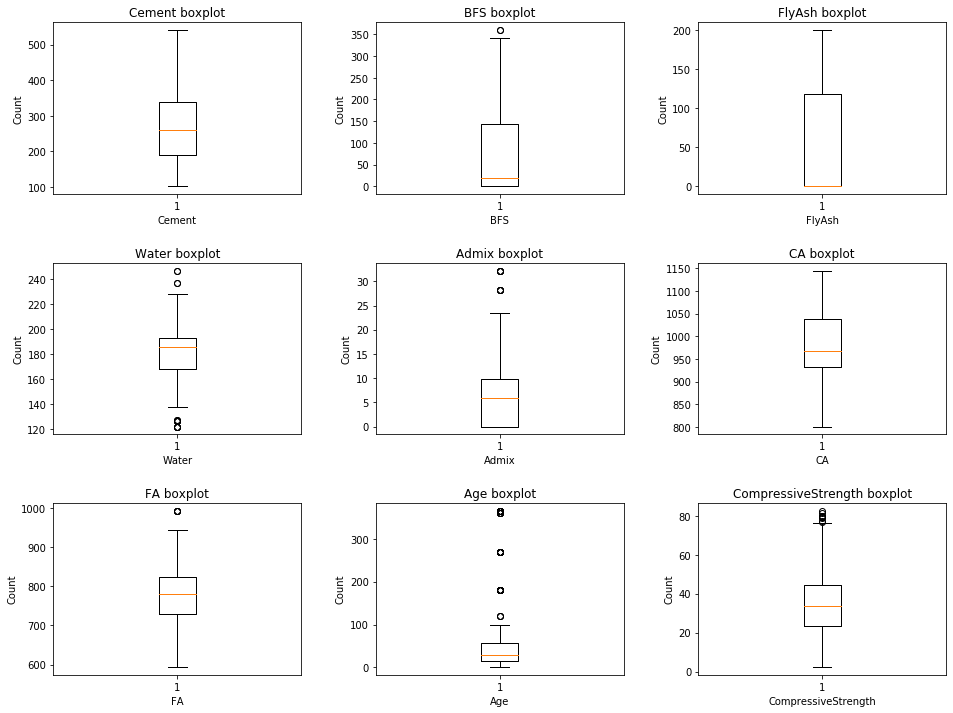

In [11]:
cols=conc.columns
j=1
plt.figure(figsize=(16,12))
for i in cols:
    plt.subplot(3,3,j)
    j+=1
    plt.boxplot(i,data=conc)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('%s boxplot'%i)
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

In [220]:
conc.describe()

,Cement,BFS,FlyAsh,Water,Admix,CA,FA,Age,CompressiveStrength,Cementitious,W/C
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,276.872883,72.526915,55.058468,182.367742,5.963105,974.596774,773.080544,46.166331,35.164002,404.458266,0.475458
std,103.769630,86.479987,64.338774,21.319533,5.926532,78.050942,80.658836,64.049753,16.288544,90.703338,0.124653
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,200.000000,0.235073
25%,190.300000,0.000000,0.000000,167.875000,0.000000,932.000000,729.750000,14.000000,23.517500,336.300000,0.397684
50%,259.950000,20.000000,0.000000,185.700000,6.000000,968.000000,780.000000,28.000000,33.745000,387.700000,0.480000
75%,339.000000,142.500000,118.300000,192.900000,9.900000,1038.500000,824.000000,56.000000,44.740000,475.000000,0.562011
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,640.000000,0.900000


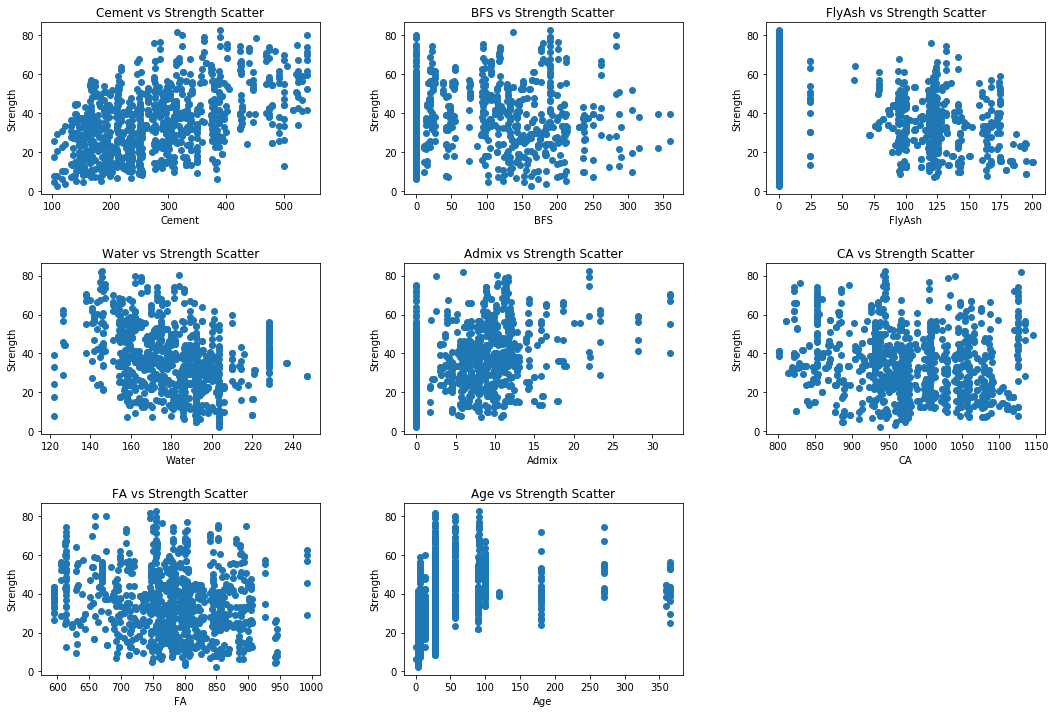

In [12]:
#Scatter plots
conc2=conc.copy()
conc2.drop(columns='CompressiveStrength',axis=1,inplace=True)
cols=conc2.columns
j=1
plt.figure(figsize=(18,12))
for i in cols:
    plt.subplot(3,3,j)
    j+=1
    plt.scatter(i,'CompressiveStrength',data=conc)
    plt.xlabel(i)
    plt.ylabel('Strength')
    plt.title('%s vs Strength Scatter'%i)
plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

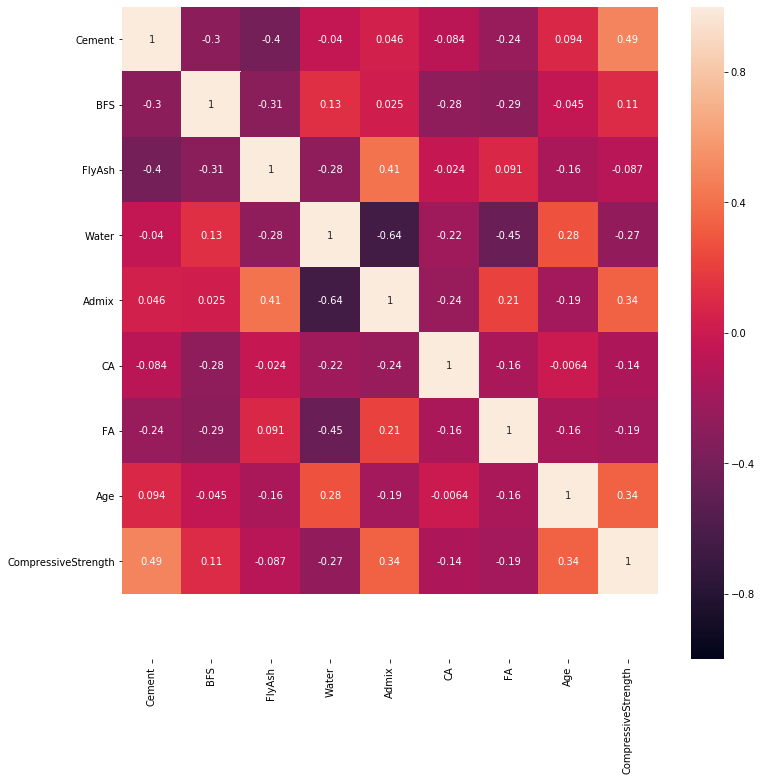

In [12]:
#Correlation between variables
plt.figure(figsize=(12,12))
ax=sb.heatmap(conc.corr(),vmin=-1,vmax=1,annot=True)
ax.set_ylim(10.0, 0)
plt.yticks(rotation=0)
plt.show()

In [107]:
l=[conc.loc[conc['Age']==i,:]['CompressiveStrength'].values for i in conc['Age'].unique()]
f,p=stats.f_oneway(*l)
print('P value:',p)
if p<0.05:
    print('Rejecting null hypothesis, the sub populations probably dont have same mean')
else:
    print('Fail to reject null hypothesis, the column may not be useful for modelling')

P value: 3.542207389671394e-101
Rejecting null hypothesis, the sub populations probably dont have same mean


In [371]:
xtrain,xtest,ytrain,ytest=train_test_split(conc.drop('CompressiveStrength',axis=1),conc.CompressiveStrength,test_size=0.2)

### Linear Regression

In [254]:
#Fitting OLS using all columns
xtrain=stm.add_constant(xtrain)
model=stm.OLS(ytrain,xtrain).fit()
model.summary()

C:\Users\Prabhath\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CompressiveStrength   R-squared:                       0.631
Model:                             OLS   Adj. R-squared:                  0.627
Method:                  Least Squares   F-statistic:                     148.6
Date:                 Tue, 10 Mar 2020   Prob (F-statistic):          8.44e-163
Time:                         11:00:19   Log-Likelihood:                -2941.2
No. Observations:                  793   AIC:                             5902.
Df Residuals:                      783   BIC:                             5949.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.3957     29.684     -0.081      0.936     -60.665      55.873
Cement           0.0331      0.004      8.348      0.000       0.025       0.041
BFS              0.0141      0.005      2.691      0.007       0.004       0.024
FlyAsh          -0.0079      0.008     -0.972      0.331      -0.024       0.008
Water           -0.0524      0.053     -0.981      0.327      -0.157       0.052
Admix            0.2664      0.102      2.620      0.009       0.067       0.466
CA               0.0178      0.010      1.737      0.083      -0.002       0.038
FA               0.0241      0.012      2.057      0.040       0.001       0.047
Age              0.1206      0.006     19.510      0.000       0.108       0.133
Cementitious     0.0392      0.014      2.818      0.005       0.012       0.067
W/C            -45.0481     12.647     -3.562      0.000     -69.875     -20.221
==============================================================================
Omnibus:                        5.645   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.699
Skew:                          -0.160   Prob(JB):                       0.0579
Kurtosis:                       3.264   Cond. No.                     2.20e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Feature engineering

Text(0.5, 1.0, 'Compressive strength vs Water Cement Ratio')

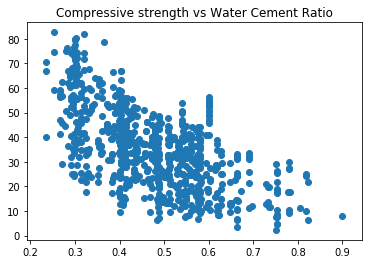

In [255]:
xtrain1=xtrain.copy()
xtrain1['Cementitious']=xtrain1['Cement']+xtrain1['FlyAsh']+xtrain1['BFS']
xtrain1['W/C']=xtrain1['Water']/xtrain1['Cementitious']
plt.scatter(xtrain1['W/C'],ytrain)
plt.title('Compressive strength vs Water Cement Ratio')

In [256]:
xtrain1.head()

,const,Cement,BFS,FlyAsh,Water,Admix,CA,FA,Age,Cementitious,W/C
889,1.0,262.0,111.0,86.0,195.0,5.0,895.0,733.0,28,459.0,0.424837
677,1.0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,255.0,0.752941
849,1.0,165.0,0.0,150.0,182.0,12.0,1023.0,729.0,28,315.0,0.577778
327,1.0,252.3,0.0,98.8,146.3,14.2,987.8,889.0,56,351.1,0.416690
1,1.0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,540.0,0.300000


In [257]:
#Correlation with added variable
train=xtrain1
train['Strength']=ytrain
train.corr()['Strength']

const                NaN
Cement          0.491779
BFS             0.106558
FlyAsh         -0.098296
Water          -0.281875
Admix           0.341620
CA             -0.124859
FA             -0.184765
Age             0.345957
Cementitious    0.602059
W/C            -0.616964
Strength        1.000000
Name: Strength, dtype: float64

In [260]:
train['Lage']=np.log(train['Age'])
xtrain2=train.loc[:,['W/C','Lage']]
xtrain2=stm.add_constant(xtrain2)

In [261]:
xtrain2

,const,W/C,Lage
889,1.0,0.424837,3.332205
677,1.0,0.752941,1.945910
849,1.0,0.577778,3.332205
327,1.0,0.416690,4.025352
1,1.0,0.300000,3.332205
...,...,...,...
175,1.0,0.298949,4.510860
545,1.0,0.752941,3.332205
962,1.0,0.649425,3.332205
323,1.0,0.454441,4.605170


In [262]:
#Correlation with added variable
train.corr()['Strength']

const                NaN
Cement          0.491779
BFS             0.106558
FlyAsh         -0.098296
Water          -0.281875
Admix           0.341620
CA             -0.124859
FA             -0.184765
Age             0.345957
Cementitious    0.602059
W/C            -0.616964
Strength        1.000000
Lage            0.559496
Name: Strength, dtype: float64

#### Model 1

In [263]:
model=stm.OLS(ytrain,xtrain2).fit() #ordinary least squares regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CompressiveStrength   R-squared:                       0.738
Model:                             OLS   Adj. R-squared:                  0.737
Method:                  Least Squares   F-statistic:                     1112.
Date:                 Tue, 10 Mar 2020   Prob (F-statistic):          2.22e-230
Time:                         11:02:02   Log-Likelihood:                -2805.4
No. Observations:                  793   AIC:                             5617.
Df Residuals:                      790   BIC:                             5631.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.4248      1.387     35.627      0.000      46.702      52.148
W/C          -85.6331      2.394    -35.777      0.000     -90.332     -80.935
Lage           8.3235      0.254     32.806      0.000       7.825       8.822
==============================================================================
Omnibus:                       14.471   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.652
Skew:                           0.173   Prob(JB):                     3.28e-05
Kurtosis:                       3.711   Cond. No.                         31.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Testing the assumptions of linear regression

In [264]:
print('Mean of the residuals:',np.mean(model.resid))
print('Standard deviation of residuals:',np.std(model.resid))

Mean of the residuals: -3.548681595180172e-14
Standard deviation of residuals: 8.321081744027206


In [265]:
model.fittedvalues[model.fittedvalues<0]

590    -1.165766
668    -5.907606
627   -11.448215
605   -11.824232
617    -8.184282
652    -5.907606
688    -5.806006
551    -5.907606
626    -4.408882
613    -0.477568
629    -3.265494
dtype: float64

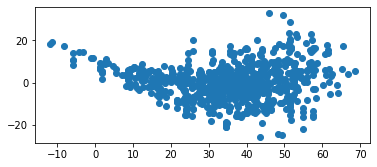

In [266]:
pred_val = model.fittedvalues
residual = ytrain - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val,residual)

In [267]:
test=durbin_watson(model.resid)
if ((test<2.2) & (test >1.8)):
    print(f'The test value of {round(test,2)} is between 1.8 and 2.2 indicating no or negligible autocorrelation.')
else:
    print('The value indicates presence of autocorrelation')

The test value of 1.97 is between 1.8 and 2.2 indicating no or negligible autocorrelation.


In [268]:
het_white(model.resid,xtrain)

(347.64026511703963,
 6.394220582467791e-45,
 10.88397890765031,
 1.953306051086825e-62)

In [240]:
het_breuschpagan(model.resid,xtrain)

(138.4702921854479,
 1.2191429538667806e-23,
 15.020541661880273,
 1.0585290576275004e-26)

In [269]:
p=jarque_bera(model.resid)[1]
if (p<0.05):
    print(f'The test value of {round(p,2)} is less than 0.05 indicating non normality of errors.')
else:
    print(f'The p value of {round(p,2)} indicates the errors are normally distributed')

The test value of 0.0 is less than 0.05 indicating non normality of errors.


We can see that the residuals are neither normally distributed nor have constant variance. Also there are some predictions going into negative values which doesnt make sense. 

In [271]:
xtrain

,const,Cement,BFS,FlyAsh,Water,Admix,CA,FA,Age,Cementitious,W/C
889,1.0,262.0,111.0,86.0,195.0,5.0,895.0,733.0,28,459.0,0.424837
677,1.0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,255.0,0.752941
849,1.0,165.0,0.0,150.0,182.0,12.0,1023.0,729.0,28,315.0,0.577778
327,1.0,252.3,0.0,98.8,146.3,14.2,987.8,889.0,56,351.1,0.416690
1,1.0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,540.0,0.300000
...,...,...,...,...,...,...,...,...,...,...,...
175,1.0,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,551.6,0.298949
545,1.0,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28,255.0,0.752941
962,1.0,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,278.4,0.649425
323,1.0,249.1,0.0,98.8,158.1,12.8,987.8,889.0,100,347.9,0.454441


#### Model 2

In [291]:
train3=np.log(xtrain[['W/C','Age']])
train3=stm.add_constant(train3)
ytrain3=np.log(ytrain)
model2=stm.OLS(ytrain3,train3).fit() #ordinary least squares regression
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CompressiveStrength   R-squared:                       0.779
Model:                             OLS   Adj. R-squared:                  0.778
Method:                  Least Squares   F-statistic:                     1392.
Date:                 Tue, 10 Mar 2020   Prob (F-statistic):          1.10e-259
Time:                         11:14:58   Log-Likelihood:                -42.829
No. Observations:                  793   AIC:                             91.66
Df Residuals:                      790   BIC:                             105.7
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4487      0.039     37.431      0.000       1.373       1.525
W/C           -1.3168      0.034    -38.433      0.000      -1.384      -1.250
Age            0.3019      0.008     38.739      0.000       0.287       0.317
==============================================================================
Omnibus:                      127.012   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.912
Skew:                          -0.949   Prob(JB):                     8.01e-53
Kurtosis:                       4.913   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

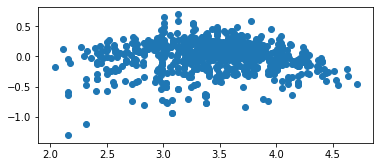

In [277]:
pred_val = model2.fittedvalues
residual = ytrain3 - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val,residual)

In [285]:
model.fittedvalues[model2.fittedvalues<0]

Series([], dtype: float64)

In [278]:
test=durbin_watson(model2.resid)
if ((test<2.2) & (test >1.8)):
    print(f'The test value of {round(test,2)} is between 1.8 and 2.2 indicating no or negligible autocorrelation.')
else:
    print('The value indicates presence of autocorrelation')

The test value of 2.02 is between 1.8 and 2.2 indicating no or negligible autocorrelation.


In [284]:
het_breuschpagan(model2.resid,train3)

(20.111454950838542,
 4.293911072586058e-05,
 10.278357411903333,
 3.919718961089046e-05)

In [282]:
p=jarque_bera(model2.resid)[1]
if (p<0.05):
    print(f'The test value of {round(p,2)} is less than 0.05 indicating non normality of errors.')
else:
    print(f'The p value of {round(p,2)} indicates the errors are normally distributed')

The test value of 0.0 is less than 0.05 indicating non normality of errors.


There has been an imrpovement of sorts (no negative predictions and improvement in test statistics) but it still has heteroskedasticity and non normality of residuals.

#### Model 3

In [290]:
xtrain4=np.log(xtrain[['W/C','Age']])
xtrain4=stm.add_constant(xtrain4)
model3=stm.OLS(ytrain,xtrain4).fit() #ordinary least squares regression
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CompressiveStrength   R-squared:                       0.769
Model:                             OLS   Adj. R-squared:                  0.768
Method:                  Least Squares   F-statistic:                     1314.
Date:                 Tue, 10 Mar 2020   Prob (F-statistic):          5.40e-252
Time:                         11:14:52   Log-Likelihood:                -2755.5
No. Observations:                  793   AIC:                             5517.
Df Residuals:                      790   BIC:                             5531.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.8211      1.184    -20.119      0.000     -26.145     -21.497
W/C          -41.3692      1.048    -39.470      0.000     -43.427     -39.312
Age            8.4312      0.238     35.370      0.000       7.963       8.899
==============================================================================
Omnibus:                       14.484   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.029
Skew:                           0.023   Prob(JB):                     2.23e-06
Kurtosis:                       3.886   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

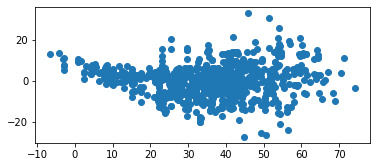

In [295]:
pred_val = model3.fittedvalues
residual = ytrain - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(pred_val,residual)

In [288]:
model.fittedvalues[model3.fittedvalues<0]

668   -2.819205
627   -3.056051
605   -6.451193
617   -4.254755
652   -2.819205
688   -2.753965
551   -2.819205
dtype: float64

Not transforming dependent variable while transforming the independent ones still results in negative predictions.

In [293]:
het_breuschpagan(model3.resid,train3)

(37.03000823660104,
 9.099884477353353e-09,
 19.348457495433582,
 6.257355577941124e-09)

In [370]:
xtest

,const,W/C,LAge
713,1.0,0.488550,1.098612
639,1.0,0.467500,3.332205
709,1.0,0.664360,4.499810
90,1.0,0.252030,1.098612
108,1.0,0.289994,1.945910
...,...,...,...
491,1.0,0.313373,1.945910
529,1.0,0.296724,4.025352
691,1.0,0.575998,1.098612
498,1.0,0.307856,3.332205


In [372]:
xtest1=xtest.loc[:,['W/C','Age']]
xtest1['LAge']=np.log(xtest1['Age'])
xtest1 = stm.add_constant(xtest1.drop('Age',axis=1))
ytest1=np.log(ytest)
pred = model2.predict(xtest1)
#RSS
rss=np.sum((pred - ytest1)**2)
print("RSS:",rss)

RSS: 567.2083843787073


In [243]:
#RMSE
rmse=(rss/len(ytest))**0.5
print('RMSE:',rmse)

RMSE: 8.91733892391561


In [374]:
mape=np.sum(np.abs((model.predict(xtest1)-ytest1))/ytest1)/len(ytest1)*100
print(mape)

48.06809966896204


### Random Forest regressor

In [441]:
conc1=conc.copy()

In [442]:
conc1['Cementitious']=conc1['Cement']+conc1['FlyAsh']+conc1['BFS']
conc1['W/C']=conc1['Water']/conc1['Cementitious']

In [443]:
model4=rfr(oob_score=True,n_estimators=500,n_jobs=-1)
model4.fit(conc1.drop('CompressiveStrength',axis=1),conc1['CompressiveStrength'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [444]:
model4.oob_score_

0.932302240928658

In [445]:
pred=model4.predict(conc1.drop('CompressiveStrength',axis=1))
r2_score(conc1['CompressiveStrength'],pred)

0.9907075186461797

Better r squared values on both training and out of bag observations than linear regression.

In [446]:
pred=model4.oob_prediction_
mape=np.sum(np.abs((model4.oob_prediction_-conc1['CompressiveStrength']))/conc1['CompressiveStrength'])/len(conc1['CompressiveStrength'])*100
print('MAPE:',mape)

MAPE: 11.014366178491189


#### Optimizing random forest

We will get a rough estimate for max depth using a simple decision tree.

In [491]:
model5=DecisionTreeRegressor().fit(conc1.drop('CompressiveStrength',axis=1),conc1['CompressiveStrength'])
model5.get_depth()

25

In [449]:
# Number of trees in random forest
n_estimators = np.arange(50,551,50)
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = np.arange(2,30,3)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
# Method of selecting samples for training each tree
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}

In [450]:
rf = rfr(oob_score=False)
rf1=GridSearchCV(rf,grid,n_jobs=-1,verbose=2)
rf1.fit(conc1.drop('CompressiveStrength',axis=1),conc1['CompressiveStrength'])

D:\Software\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 2970 candidates, totalling 8910 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 8910 out of 8910 | elapsed: 13.1min finished
D:\Software\Anaconda\lib\site-packages\sklearn\mod

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_stat...
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  5,  8, 

In [451]:
rf1.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Fitting a model with parameters obtained from grid search.

In [452]:
modelfin=rfr(n_estimators=50,n_jobs=-1,max_depth=20,oob_score=True)
modelfin.fit(conc1.drop('CompressiveStrength',axis=1),conc1['CompressiveStrength'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [453]:
pred=modelfin.predict(conc1.drop('CompressiveStrength',axis=1))
print('R squared value for training data:',r2_score(conc1['CompressiveStrength'],pred))
print('OOB R squared value:',modelfin.oob_score_)

R squared value for training data: 0.9901224505355393
OOB R squared value: 0.925884950852585


In [454]:
pred=modelfin.oob_prediction_
mape=np.sum(np.abs((model4.oob_prediction_-conc1['CompressiveStrength']))/conc1['CompressiveStrength'])/len(conc1['CompressiveStrength'])*100
print('MAPE:',mape)

MAPE: 11.014366178491189


#### Prediction & Water Demand

For completing hydration process and filling the gel pores cement typically required about 0.38 times its weight of water under ideal conditions. But the obtained mix will be very stiff and not workable (slump around 25mm). <br>
IS 10262 gives a guideline: for every 25mm increase in slump required water required is increased by 3%.

In [457]:
a={'wr':0.1,'hwr':0.2,'none':0}
cement=float(input('Enter cement content:'))
flyash=float(input('Enter flyash content:'))
ggbs=float(input('Enter GGBS content:'))
water=float(input('Enter water content:'))
slump=float(input('Enter slump required:'))
age=float(input('Enter age in days @ which prediction is required:'))
admix=str(input('Enter WR or HWR or NO for type of admixture used(water reducer, high range water reducer and no admixture):'))
ca=float(input('Enter coarse aggregate content:'))
fa=float(input('Enter fine aggregate content:'))
ac=cementitious*0.02
cementitious=cement+flyash+ggbs
test=pd.DataFrame({'Cement':cement,'GGBS':ggbs,'Flyash':flyash,'Water':water,'Admix':ac,'Coarse Agg':ca,'Fine agg':fa},index=[1])
test['Age']=age
test['Cementitious']=cementitious
test['W/C']=water/cementitious
if water<(0.38*cementitious+(0.38*cementitious*0.03*(slump-25)/25)-(0.38*cementitious+(0.25*cementitious*0.03*(slump-25)/25))*a[admix.lower()]):
    print("Water content is probably not enough")
    print('Predicted compressive strength:',modelfin.predict(test)[0])
elif (((cementitious/3000+water/1000+ac/1145+ca/2600+fa/2600) >0.9) & (cementitious/3000+water/1000+ac/1145+ca/2600+fa/2600<1.1)):
    print('Predicted compressive strength:',modelfin.predict(test)[0])
else:
    print(f'Contents not adding upto 1cum, instead {(cementitious/3000+water/1000+ac/1145+ca/2600+fa/2600)}')

Enter cement content:400
Enter flyash content:0
Enter GGBS content:0
Enter water content:150
Enter slump required:200
Enter age in days @ which prediction is required:28
Enter WR or HWR or NO for type of admixture used(water reducer, high range water reducer and no admixture):wr
Enter coarse aggregate content:800
Enter fine aggregate content:800
Water content is probably not enough


In [481]:
def pred(cem,fash,ggbs,water,slump,age,admix,ca,fa):
    a={'wr':0.1,'hwr':0.2,'none':0}
    cementitious=cem+fash+ggbs
    ac=cementitious*0.02
    cementitious=cem+fash+ggbs
    test=pd.DataFrame({'Cement':cem,'GGBS':ggbs,'Flyash':fash,'Water':water,'Admix':ac,'Coarse Agg':ca,'Fine agg':fa},index=[1])
    test['Age']=age
    test['Cementitious']=cementitious
    test['W/C']=water/cementitious
    if water<(0.38*cementitious+(0.38*cementitious*0.03*(slump-25)/25)-(0.38*cementitious+(0.25*cementitious*0.03*(slump-25)/25))*a[admix.lower()]):
        print("Water content is probably not enough")
        print('Predicted compressive strength:',round(modelfin.predict(test)[0],2),'MPA')
    elif (((cementitious/3000+water/1000+ac/1145+ca/2600+fa/2600) >0.9) & (cementitious/3000+water/1000+ac/1145+ca/2600+fa/2600<1.1)):
        print('Predicted compressive strength:',round(modelfin.predict(test)[0],2),'MPA')
    else:
        print(f'Contents volume comes to {(cementitious/3000+water/1000+ac/1145+ca/2600+fa/2600)} instead of 1cum')

In [490]:
pred(400,0,0,130,50,28,'hwr',800,800)

Contents volume comes to 0.8857048482812675 instead of 1cum
